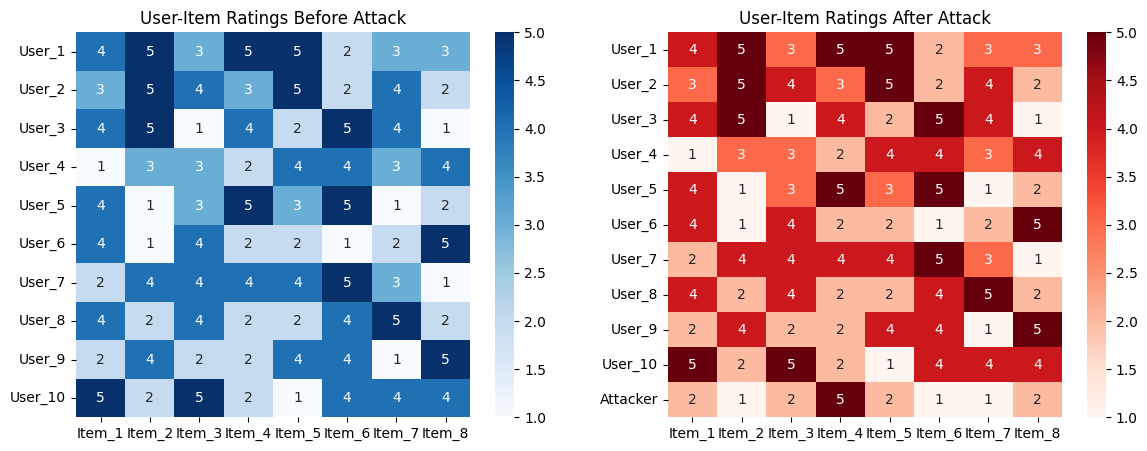

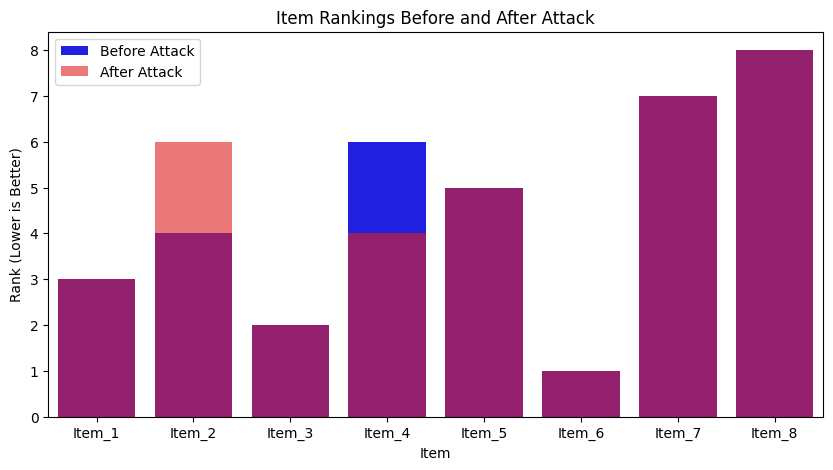

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds

# Step 1: Generate a synthetic user-item rating matrix
np.random.seed(42)
num_users = 10
num_items = 8
ratings = np.random.randint(1, 6, (num_users, num_items))  # Ratings between 1 and 5

# Convert to DataFrame for visualization
ratings_df = pd.DataFrame(ratings, columns=[f'Item_{i+1}' for i in range(num_items)])
ratings_df.index = [f'User_{i+1}' for i in range(num_users)]

# Function to apply SVD-based collaborative filtering
def recommend_items(rating_matrix, k=3):
    rating_matrix = rating_matrix.astype(float)
    U, sigma, Vt = svds(rating_matrix, k=k)
    sigma = np.diag(sigma)
    reconstructed_matrix = np.dot(np.dot(U, sigma), Vt)
    return reconstructed_matrix

# Compute original recommendations
original_recommendations = recommend_items(ratings)

# Step 3: Introduce a fake user (attacker) who rates a target item very high
fake_user = np.random.randint(1, 3, (1, num_items))
fake_user[0, 3] = 5  # Attacker targets "Item_4"

# Append fake user to the dataset
ratings_with_attack = np.vstack([ratings, fake_user])

# Compute recommendations after attack
attacked_recommendations = recommend_items(ratings_with_attack)

# Get item rankings before and after attack
original_ranking = np.argsort(-original_recommendations.mean(axis=0))
attacked_ranking = np.argsort(-attacked_recommendations.mean(axis=0))

# Convert rankings to DataFrame
ranking_df = pd.DataFrame({
    'Item': [f'Item_{i+1}' for i in range(num_items)],
    'Rank Before Attack': np.argsort(original_ranking) + 1,
    'Rank After Attack': np.argsort(attacked_ranking) + 1
})

# Step 5: Visualizations
plt.figure(figsize=(14, 5))

# Heatmap Before Attack
plt.subplot(1, 2, 1)
sns.heatmap(ratings, annot=True, cmap="Blues", fmt="d", xticklabels=[f'Item_{i+1}' for i in range(num_items)],
            yticklabels=[f'User_{i+1}' for i in range(num_users)])
plt.title("User-Item Ratings Before Attack")

# Heatmap After Attack
plt.subplot(1, 2, 2)
sns.heatmap(ratings_with_attack, annot=True, cmap="Reds", fmt="d", xticklabels=[f'Item_{i+1}' for i in range(num_items)],
            yticklabels=[f'User_{i+1}' for i in range(num_users)] + ["Attacker"])
plt.title("User-Item Ratings After Attack")

plt.show()

# Bar Plot for Item Rankings
plt.figure(figsize=(10, 5))
sns.barplot(x='Item', y='Rank Before Attack', data=ranking_df, label="Before Attack", color="blue")
sns.barplot(x='Item', y='Rank After Attack', data=ranking_df, label="After Attack", color="red", alpha=0.6)
plt.legend()
plt.title("Item Rankings Before and After Attack")
plt.ylabel("Rank (Lower is Better)")
plt.show()